In [1]:
import pandas as pd
pf = pd.read_csv("used_car_train.csv",sep=" ")
tf = pd.read_csv("used_car_testA.csv",sep=" ")
#二手车交易价格预测：数据包含31列变量信息，其中15列为匿名变量。15万条作为训练集，5万条作为测试集A，5万条作为测试集B

# 1.数据分析


1.1 #观测训练集数据结构

In [2]:
pd.set_option('display.max_columns', None)  #显示所有数据
pf

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,0.0,4576,0,0,20160327,5900,45.316543,-3.139095,-1.269707,-0.736609,-1.505820,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,0.0,2826,0,0,20160312,9500,45.972058,-3.143764,-0.023523,-2.366699,0.698012,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,0.0,3302,0,0,20160328,7500,44.733481,-3.105721,0.595454,-2.279091,1.423661,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,0.0,1877,0,0,20160401,4999,45.658634,-3.204785,-0.441680,-1.179812,0.620680,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


1.2 #观察数据的总体概况
#describe种有每列的统计量，个数count、平均值mean、方差std、最小值min、中位数25% 50% 75% 、以及最大值。 观测这次信息主要是瞬间掌握数据
#的大概的范围以及每个值的异常值的判断，比如有的时候会发现999 9999 -1 等值这些其实都是nan，数据预处理时对异常值一般都要进行填充,如对异
#常值使用中位数、平均值等填充 # pf.describe()["SaleID"][6] = 112499.25

In [3]:
pf.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,2583.077267,0.000007,0.0,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,1885.363218,0.002582,0.0,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,0.000000,0.0,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,0.000000,0.0,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,0.000000,0.0,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,8120.000000,1.000000,0.0,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


#1.3判断数据中是否有缺失值和异常值，可视化异常值

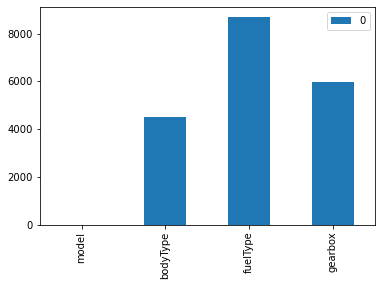

In [4]:
from matplotlib import pyplot as plt
exception =  pf.isnull().sum()
exception1 = exception[exception > 0]
exception1 = sorted(exception1.values.tolist())  #排序 [1, 4506, 5981, 8680]
null = exception[exception > 0]
aa = pd.DataFrame(null)  #转成Dataframe
aa.T.columns.tolist()    #获取缺失值字段  ['model', 'bodyType', 'fuelType', 'gearbox']
aa.plot.bar()

通过异常值直观的了解到['model', 'bodyType', 'fuelType', 'gearbox']列中存在 “nan”, 并可以把nan的个数打印，主要的目的在于 nan存在的个数是否真的很大，如果很小一般选择填充，如果使用lgb等树模型可以直接空缺，让树自己去优化，但如果nan存在的过多、可以考虑删掉

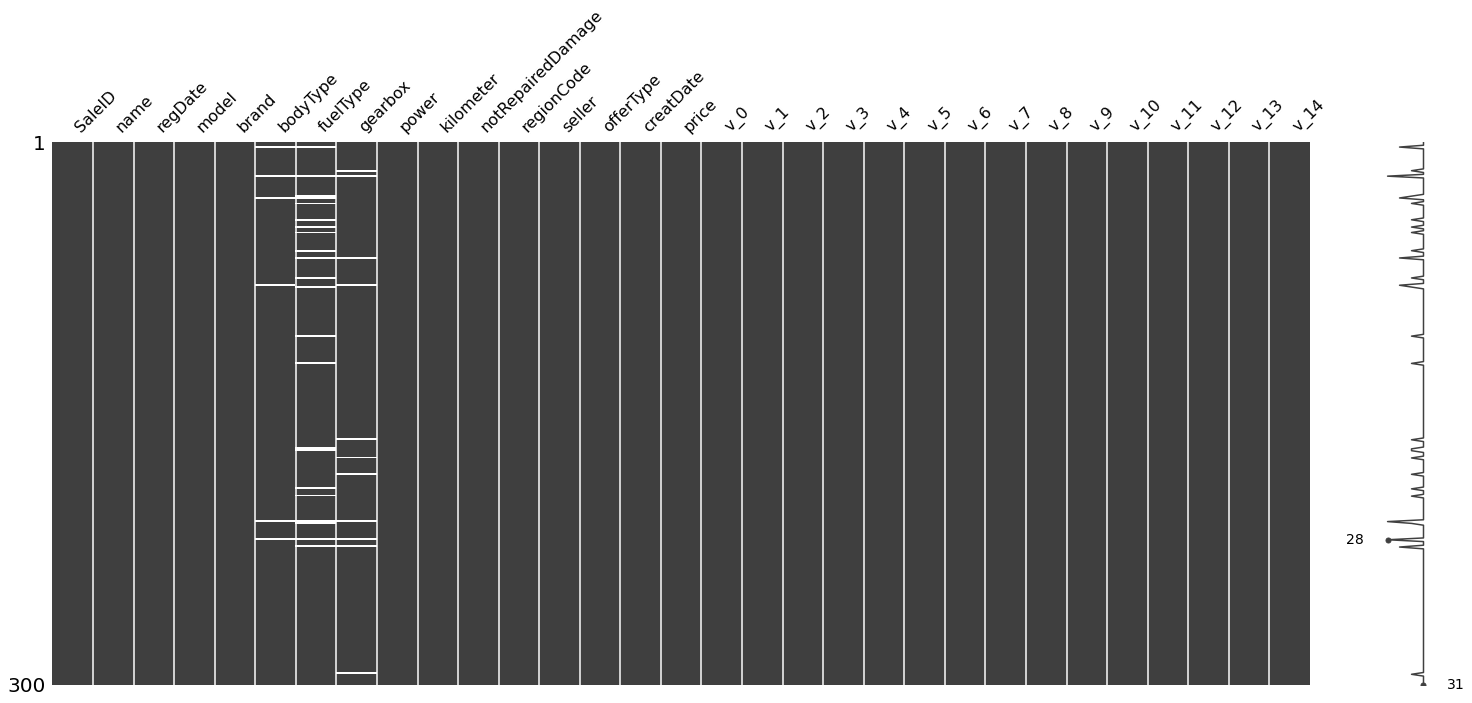

In [5]:
#可视化缺失值
import missingno as msno
msno.matrix(pf.sample(300))

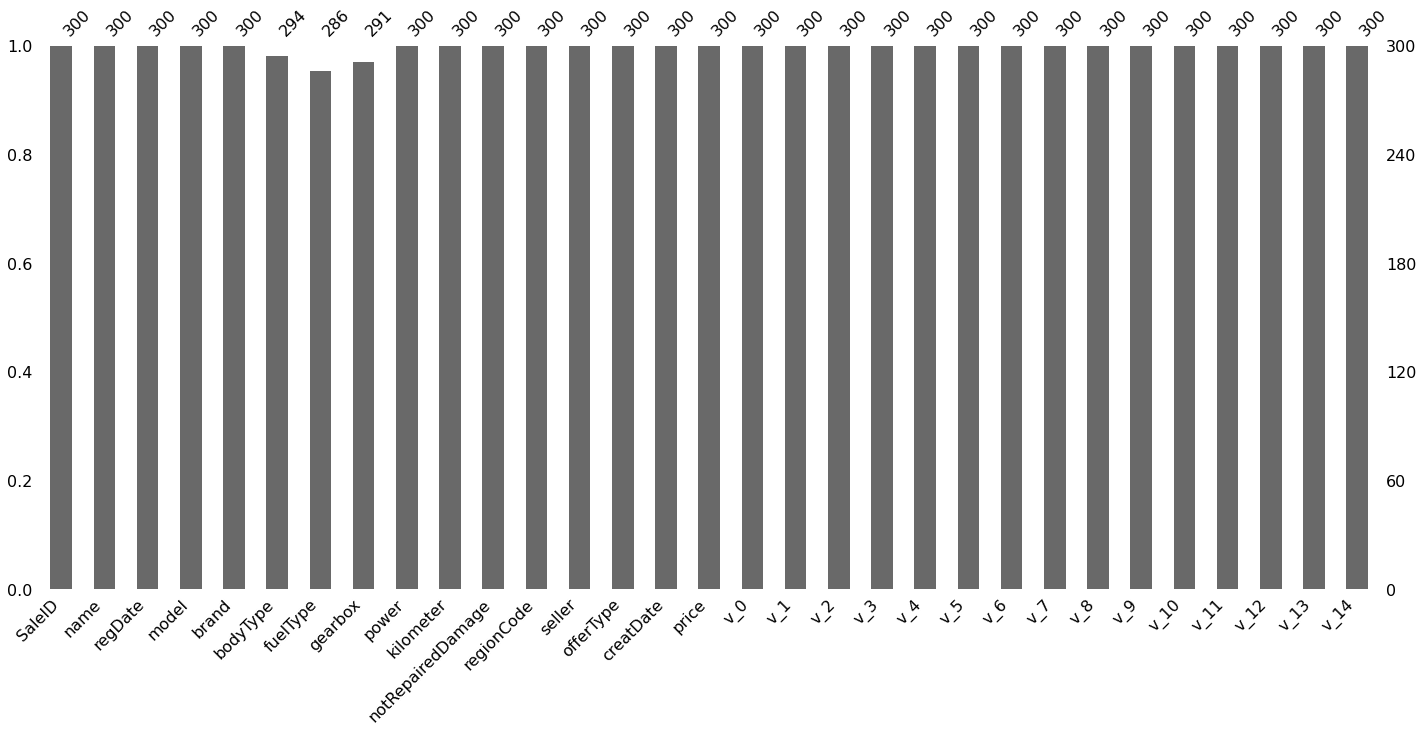

In [6]:
msno.bar(pf.sample(300))

#1.4 查看数据的类型，观察数据中是否存在除了nan以外的特殊符号异常

In [7]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [8]:
pf.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [9]:
#发现除了notRepairedDamage 为object类型其他都为数字,显示异常值
pf["notRepairedDamage"].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [10]:
 pf["notRepairedDamage"] =pf["notRepairedDamage"].apply(lambda x: 0 if x =="-" else x)    #将-替换成nan

In [11]:
pf["notRepairedDamage"].value_counts()

0.0    111361
0       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

1.5#统计各组值的分布

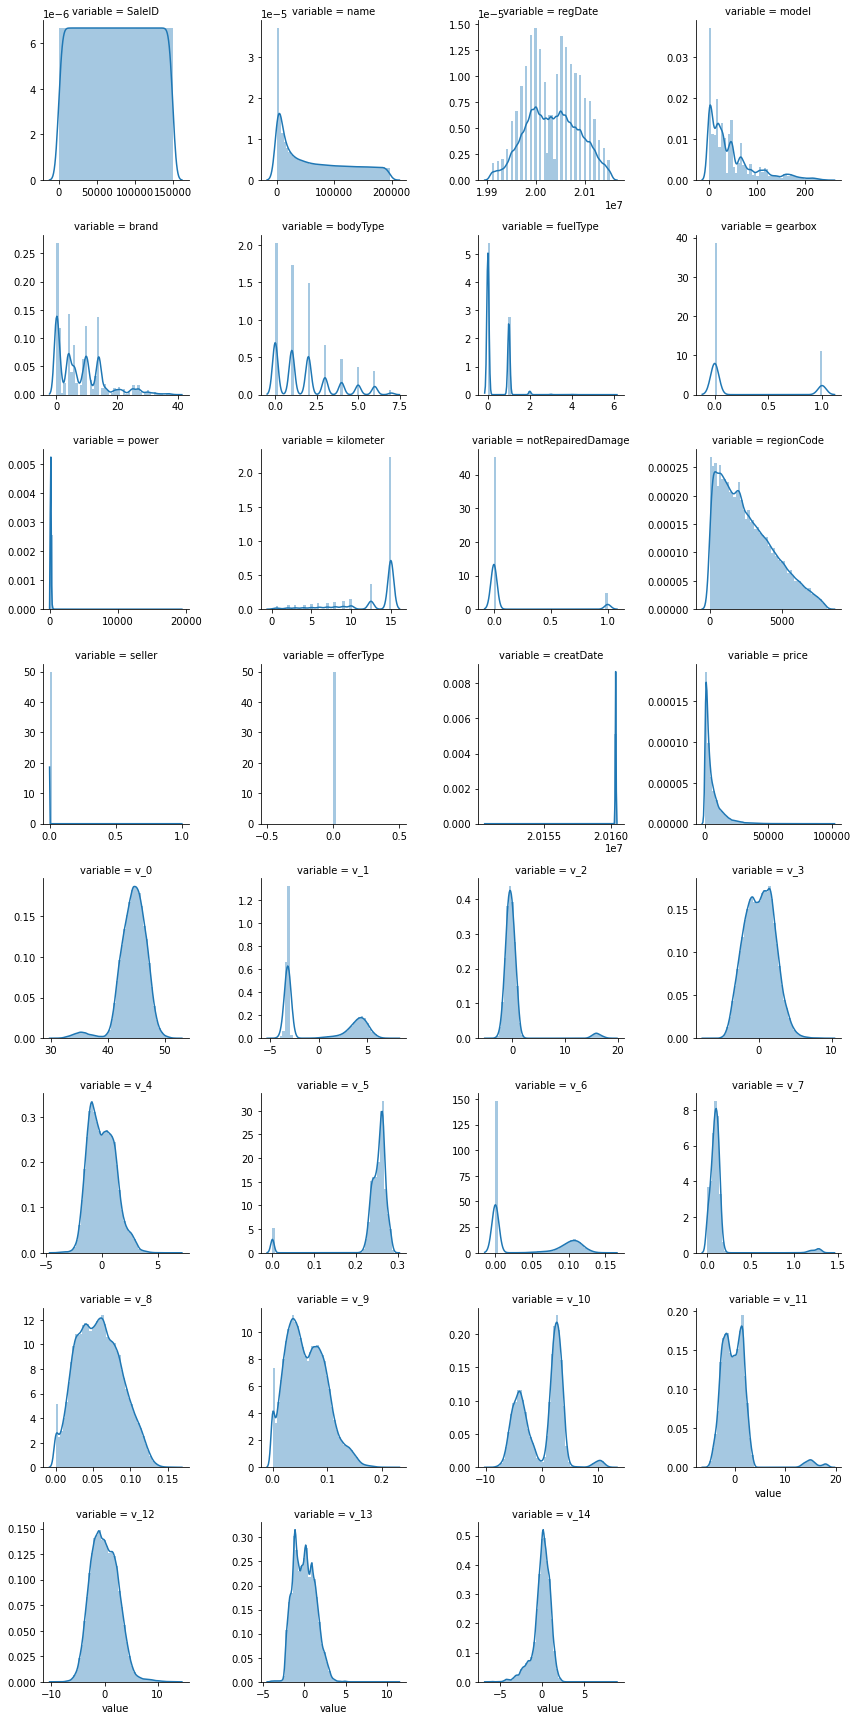

In [12]:
## 特征分布可视化
import warnings
import seaborn
warnings.filterwarnings('ignore')
f = pd.melt(pf, value_vars=pf[pf.columns])
g = seaborn.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(seaborn.distplot, "value")
#g.savefig("特征分布.png")

In [13]:
# 观测到offerType和seller类别特征严重倾斜，一般不会对预测有什么帮助，故这边先删掉

In [13]:
pf['offerType'].value_counts()

0    150000
Name: offerType, dtype: int64

In [14]:
pf['seller'].value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [15]:
del pf['offerType']
del pf['seller']

1.6 观察预测值的分布

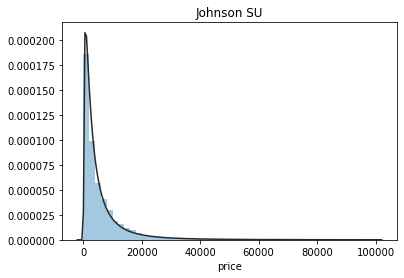

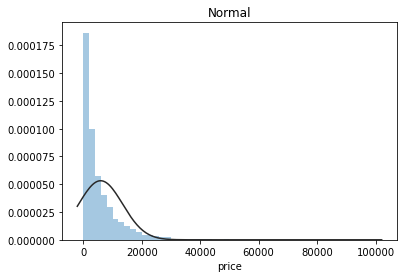

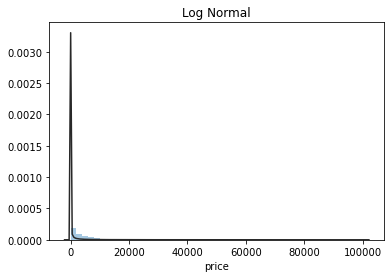

In [17]:
## 1) 总体分布概况（无界约翰逊分布等）
import scipy.stats as st
from matplotlib import pyplot as plt
y = pf['price']
plt.figure(1); plt.title('Johnson SU')
seaborn.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
seaborn.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
seaborn.distplot(y, kde=False, fit=st.lognorm)

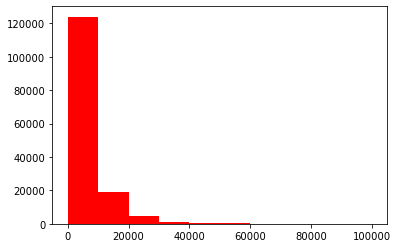

In [16]:
## 查看预测值的具体频数
#查看频数, 大于20000得值极少，其实这里也可以把这些当作特殊得值（异常值）直接用填充或者删掉，再前面进
plt.hist(pf['price'], orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

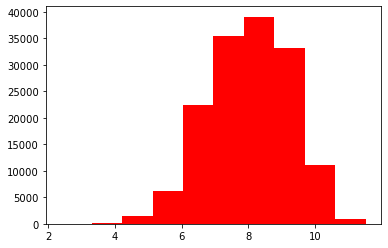

In [15]:
# log变换 z之后的分布较均匀，可以进行log变换进行预测
import numpy as np
plt.hist(np.log(pf['price']), orientation = 'vertical',histtype = 'bar', color ='red') 
plt.show()

#价格不服从正态分布，所以在进行回归之前，它必须进行转换。虽然对数变换做得很好，但最佳拟合是无界约翰逊分布

# 综上分析：
1.通过分析缺失值，['model', 'bodyType', 'fuelType', 'gearbox']列的缺失值为 [1, 4506, 5981, 8680]，因此删除'bodyType', 'fuelType', 'gearbox'列
2.通过数据类型分析，"notRepairedDamage"列中存在24324个"-"值，考虑用nan进行替换
3.观测到offerType和seller类别特征严重倾斜，一般不会对预测有什么帮助，故这边先删掉
4.预测价格不是服从正态分布，因此进行对数变换